In [ ]:
# Random Forest Regressor using clean data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [39]:
df = pd.read_csv('cleandata.csv')

# Define bins and labels with ranges attached
bins = [0, 11000, 44725, 95375, 182100, 231250, float('inf')]
labels = [
    'Low (0–11k)',
    'Lower Middle (11k–44.7k)',
    'Middle (44.7k–95.3k)',
    'Upper Middle (95.3k–182.1k)',
    'High (182.1k–231.2k)',
    'Very High (231.2k+)'
]

# Apply the cut
df['SalaryCategory'] = pd.cut(df['compUSD'], bins=bins, labels=labels)

# View counts per category
print(df['SalaryCategory'].value_counts())
print(df[['compUSD', 'SalaryCategory']].head())




SalaryCategory
Middle (44.7k–95.3k)           13316
Upper Middle (95.3k–182.1k)     7090
Lower Middle (11k–44.7k)        3401
High (182.1k–231.2k)            1023
Very High (231.2k+)             1006
Low (0–11k)                       82
Name: count, dtype: int64
   compUSD            SalaryCategory
0  55000.0      Middle (44.7k–95.3k)
1  78524.0      Middle (44.7k–95.3k)
2  34000.0  Lower Middle (11k–44.7k)
3  65000.0      Middle (44.7k–95.3k)
4  67000.0      Middle (44.7k–95.3k)


In [40]:
print(df.dtypes)

print(df["overallProExp"].unique())

ageRange               object
industry               object
annualSalary            int64
addIncome             float64
currency               object
workCountry            object
usState                object
usCity                 object
overallProExp          object
fieldExp               object
eduLevel               object
gender                 object
race                   object
totalCompensation     float64
compUSD               float64
race_grouped           object
SalaryCategory       category
dtype: object
['5-7' '8-10' '2-4' '21-30' '11-20' '0-1' '41+' '31-40']


In [41]:
# group other response
print(df["gender"].unique())

['Woman' 'Non-binary' 'Man' 'Other']


In [42]:
# most data is people of one race, so group all others under mixed/aother
print(df['race_grouped'].value_counts())

race_grouped
White                                                     21696
Mixed                                                      1282
Asian or Asian American                                    1252
Black or African American                                   642
Hispanic, Latino, or Spanish origin                         537
Another option not listed here or prefer not to answer      523
Name: count, dtype: int64


In [43]:
print("NaNs in SalaryCat: ", df["SalaryCategory"].isna().sum())


# Drop rows where salary category couldn't be assigned (NaN)
df = df.dropna(subset=['SalaryCategory'])

print("NaNs in SalaryCat: ", df["SalaryCategory"].isna().sum())


NaNs in SalaryCat:  14
NaNs in SalaryCat:  0


In [44]:
# drop all columns associated with salary and compensation
df.drop(columns=['totalCompensation', 'annualSalary', 'addIncome'], inplace=True)

In [45]:
df.isna().sum()

ageRange             0
industry             0
currency             0
workCountry          0
usState           3358
usCity              72
overallProExp        0
fieldExp             0
eduLevel             0
gender               0
race                 0
compUSD              0
race_grouped         0
SalaryCategory       0
dtype: int64

In [52]:
# Features and target
X = df.drop(columns=['compUSD', 'SalaryCategory'])
y = df['SalaryCategory']

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['workCountry'])


# ADD THIS:
clf = RandomForestClassifier(
    n_estimators=1200,
    random_state=42,
    max_depth=100,
)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                             precision    recall  f1-score   support

       High (182.1k–231.2k)       0.35      0.07      0.12       211
                Low (0–11k)       0.00      0.00      0.00        12
   Lower Middle (11k–44.7k)       0.62      0.14      0.23       684
       Middle (44.7k–95.3k)       0.60      0.85      0.71      2638
Upper Middle (95.3k–182.1k)       0.50      0.41      0.45      1429
        Very High (231.2k+)       0.38      0.14      0.21       210

                   accuracy                           0.57      5184
                  macro avg       0.41      0.27      0.29      5184
               weighted avg       0.55      0.57      0.53      5184



/Users/andrewxue/Desktop/csds133SalarySurvey/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrewxue/Desktop/csds133SalarySurvey/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrewxue/Desktop/csds133SalarySurvey/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

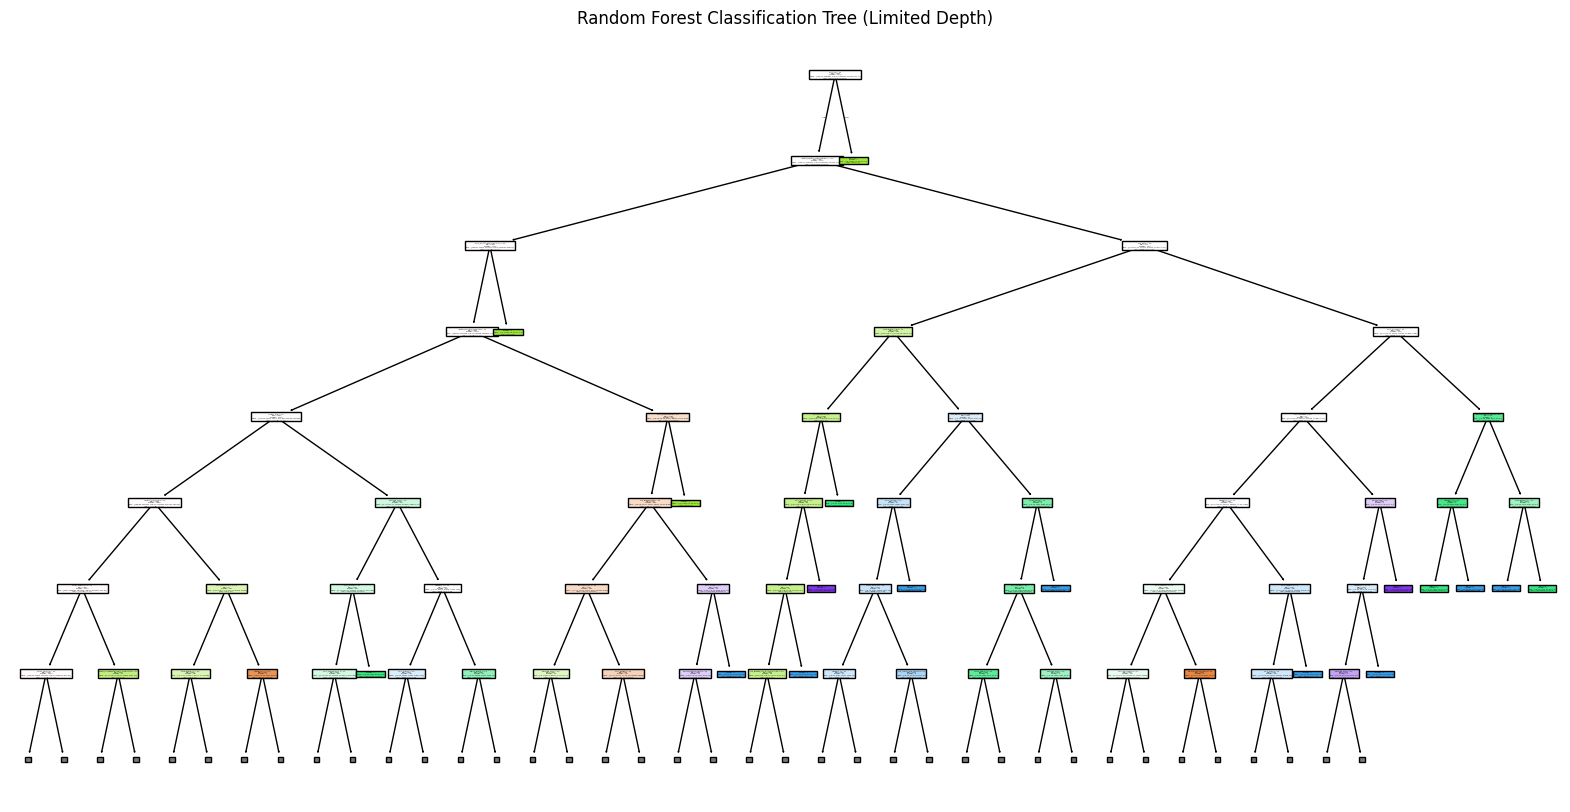

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=clf.classes_, filled=True, max_depth=7)
plt.title("Random Forest Classification Tree (Limited Depth)")
plt.show()


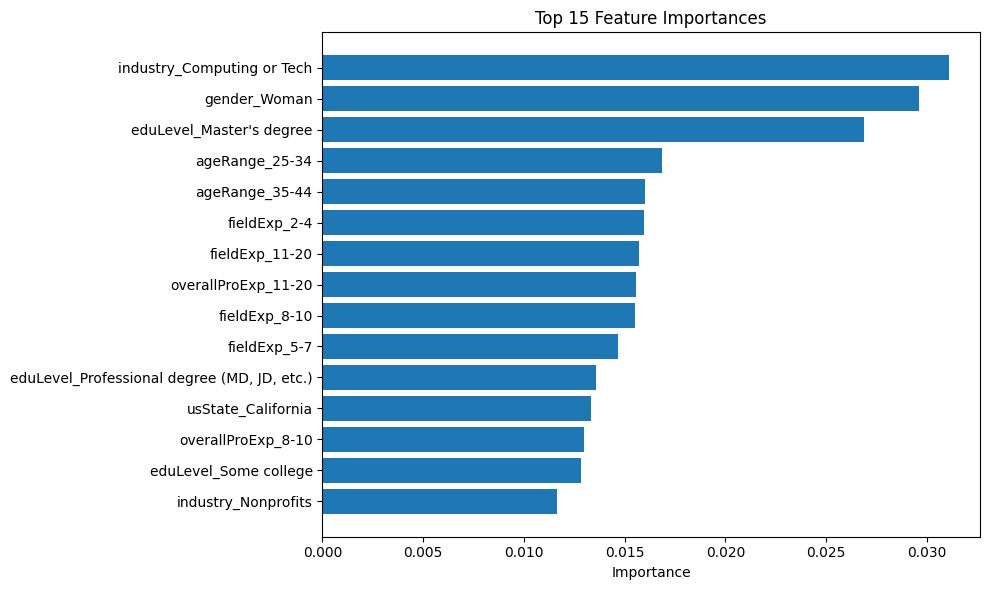

In [49]:
# Get feature importances
importances = clf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

top_n = 15  # Change to however many top features you want to display
top_features = feature_importances.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])  # Reverse for highest on top
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.tight_layout()
plt.show()

